In [1]:
!pip install langextract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.2/106.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.7 MB/s eta 0:00:00


In [2]:
!pip install docling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.3/164.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 32.2 MB/s eta 0:00:00
   ━━━━

In [6]:
import langextract as le
import textwrap
import warnings
warnings.filterwarnings("ignore")


In [4]:
prompt = textwrap.dedent("""\
Identify and extract entities from the contract under three main categories:
1. Parties & Identifiers
   - Entity Names: NGOs, UN agencies, companies, agents, counterparties
   - Roles: First party, second party, mediator, supplier
   - Identifiers: Registration numbers, account IDs, references

2. Financial Information
   - Amounts: Principal sums, payments, reimbursements
   - Fees & Commissions: Service charges, commission rates, penalties
   - Currencies: USD, EUR, SYP, TL, or others
   - Exchange Rates: Agreed or competitive rates, % rates

3. Dates & Durations
   - Agreement Dates: Effective date, signature date, expiry date
   - Payment/Obligation Dates: Due dates, notice periods (e.g., 7 days, 2 weeks)
   - Contract Duration: Validity period in months, transaction timelines
   - Historical Dates: Distribution or reimbursement dates

Rules:
- Use the exact wording from the document (no paraphrasing).
- Do not overlap entities (each entity should appear once in its correct category).
- Add meaningful attributes (e.g., “currency: USD” or “notice period: 2 weeks”).
""")


In [7]:
from docling.document_converter import DocumentConverter

source = "/content/Sample_Contract.pdf"
converter = DocumentConverter()
result = converter.convert(source)
doc=result.document.export_to_markdown()



In [8]:
doc

"## SAMPLE CONTRACT\n\n## This contract (The Agreement) is effective (Date)\n\nbetween\n\nNGO/UN agency hereinafter referred to as the 'first party '\n\nand\n\nCompany/agent hereinafter referred to as ' second party '\n\nWHEREAS the first party desires to transfer money from Turkey into Syria within the frame of its humanitarian activities in the north of Idleb Governorate, Syria, and the second party has the proven capacity, experience and highest reasonable standard of financial due diligence to facilitate the transfers.\n\nThe Parties agree to nominate one primary contact person to manage this account on daily basis and to collaborate as follows:\n\n## ARTICLE 1. Objective of the Agreement\n\n- 1.1. The first party intends to transfer money to people residing in areas outside of the control of the Government of Syria;\n- 1.2. The second party has the proven capacity, experience and highest reasonable standard of diligence to facilitate the transfers.\n\n## ARTICLE 2. Obligations of 

In [13]:
from docling.document_converter import DocumentConverter
import pandas as pd
import re

# Initialize Docling PDF converter
converter = DocumentConverter()

# Path to your PDF file
pdf_file = r"/content/Sample_Contract.pdf"
converted = converter.convert(pdf_file)

# Extract text as markdown
contract_text = converted.document.export_to_markdown()

# Define patterns to extract entities
entity_patterns = {
    "DATE": re.findall(r"\b(?:\d{1,2}\s\w+\s\d{4}|\w+\s\d{4})\b", contract_text),
    "CURRENCY": re.findall(r"(?:USD|EUR|INR)\s?[0-9,]+(?:\.\d{2})?", contract_text),
    "CONTRACT_REF": re.findall(r"\bCON-\w+-\d+\b", contract_text)
}

# Flatten results into a list of tuples
entity_list = [(etype, value) for etype, values in entity_patterns.items() for value in values]

# Create DataFrame
df_entities = pd.DataFrame(entity_list, columns=["Entity Type", "Extracted Value"])

# Remove duplicates
df_entities.drop_duplicates(inplace=True)

# Show the extracted entities
display(df_entities)


,Entity Type,Extracted Value


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

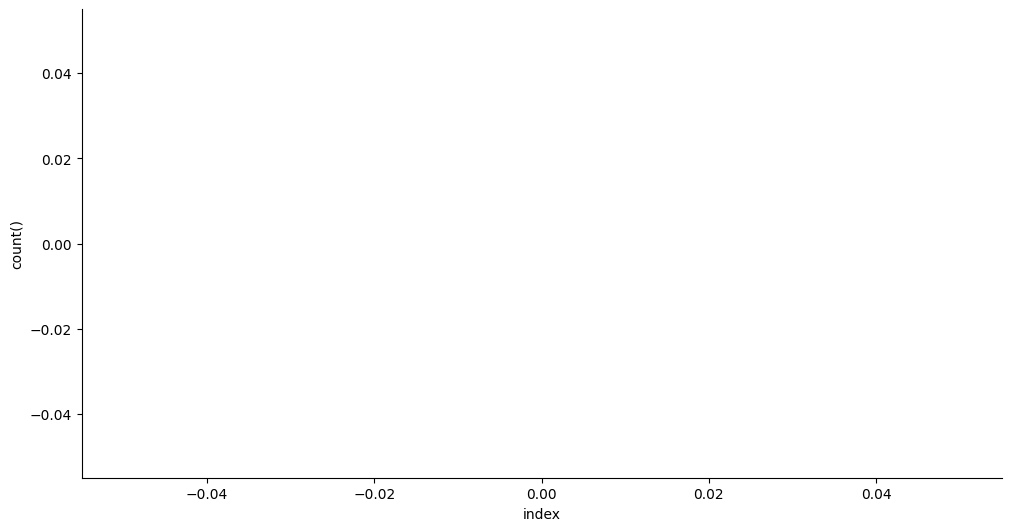

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')